In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load Dataset
df=pd.read_csv('Iris.csv')

In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.shape

(150, 6)

Sepal Length vs Sepal Width of IRIS Setosa

In [5]:
df.SepalLengthCm.corr(df.SepalWidthCm)

-0.10936924995064935

In [6]:
#taking only first 50 columns of Iris-setosa species
m,n=df.shape
X=df.SepalLengthCm.iloc[0:120].values.reshape(120,1)
Y=df.SepalWidthCm.iloc[0:120].values.reshape(120,1)

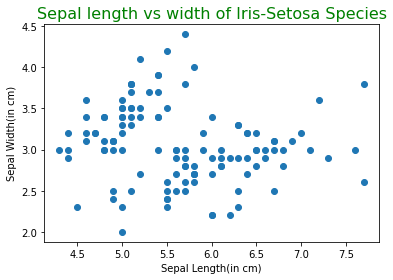

In [7]:
plt.scatter(X,Y)
plt.xlabel('Sepal Length(in cm)')
plt.ylabel('Sepal Width(in cm)')
plt.title('Sepal length vs width of Iris-Setosa Species',color='green',fontsize=16)
plt.show()

Without Gradient Descent